<a href="https://colab.research.google.com/github/AnaCristina1972/aranoua/blob/main/trabalhoIfam_Ana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Origem e Contexto dos Dados:**

Os dados utilizados nesta análise foram obtidos do [Portal da Transparência](https://www.portaltransparencia.gov.br/), uma iniciativa governamental que visa promover a transparência e o acesso às informações públicas. Especificamente, esses dados referem-se às despesas do governo ao longo dos últimos cinco anos, fornecendo uma visão detalhada dos gastos realizados em diferentes áreas e programas.

**Objetivo da Análise:**

O objetivo desta análise é examinar e compreender os padrões de gastos do governo ao longo do tempo, identificando tendências, áreas de maior investimento e eventuais variações nos gastos. Ao explorar esses dados, podemos obter insights valiosos sobre as prioridades de gastos do governo, avaliar a eficácia dos programas e políticas implementadas e promover uma melhor compreensão do uso dos recursos públicos.

Por meio desta análise, busca-se fornecer uma visão abrangente e informativa dos gastos do governo, contribuindo para uma maior transparência e accountability na gestão dos recursos públicos.

**Autora da Pesquisa:**
Ana Cristina da Silva Vieira




In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [32]:
# Carregar os dados de cada ano em DataFrames separados
dados_2020 = pd.read_csv('/content/2020_OrcamentoDespesa.csv', encoding='latin1', sep=";")
dados_2021 = pd.read_csv('/content/2021_OrcamentoDespesa.csv', encoding='latin1', sep=";")
dados_2022 = pd.read_csv('/content/2022_OrcamentoDespesa.csv', encoding='latin1', sep=";")
dados_2023 = pd.read_csv('/content/2023_OrcamentoDespesa.csv', encoding='latin1', sep=";")
dados_2024 = pd.read_csv('/content/2024_OrcamentoDespesa.csv', encoding='latin1', sep=";")
tabela_completa = pd.concat([dados_2020, dados_2021, dados_2022, dados_2023, dados_2024], ignore_index=True)

In [33]:
tabela_completa

,EXERCÍCIO,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO SUBORDINADO,NOME ÓRGÃO SUBORDINADO,CÓDIGO UNIDADE ORÇAMENTÁRIA,NOME UNIDADE ORÇAMENTÁRIA,CÓDIGO FUNÇÃO,NOME FUNÇÃO,CÓDIGO SUBFUNÇÃO,...,CÓDIGO CATEGORIA ECONÔMICA,NOME CATEGORIA ECONÔMICA,CÓDIGO GRUPO DE DESPESA,NOME GRUPO DE DESPESA,CÓDIGO ELEMENTO DE DESPESA,NOME ELEMENTO DE DESPESA,ORÇAMENTO INICIAL (R$),ORÇAMENTO ATUALIZADO (R$),ORÇAMENTO EMPENHADO (R$),ORÇAMENTO REALIZADO (R$)
0,2020,14000,Justiça Eleitoral,14000,Justiça Eleitoral - Unidades com vínculo direto,14101,TRIBUNAL SUPERIOR ELEITORAL,2,Judiciária,61,...,3,DESPESAS CORRENTES,3,Outras Despesas Correntes,39,Outros Serviços de Terceiros - Pessoa Jurídica,"0,00","0,00","9941692,63","2682717,43"
1,2020,20000,Presidência da República,20116,Fundo de Imprensa Nacional,20927,FUNDO DE IMPRENSA NACIONAL,4,Administração,122,...,3,DESPESAS CORRENTES,1,Pessoal e Encargos Sociais,16,Outras Despesas Variáveis - Pessoal Civil,"100000,00","100000,00","100000,00","54586,60"
2,2020,20000,Presidência da República,20116,Fundo de Imprensa Nacional,20927,FUNDO DE IMPRENSA NACIONAL,9,Previdência social,272,...,3,DESPESAS CORRENTES,1,Pessoal e Encargos Sociais,3,Pensões,"65234245,69","65234245,69","64755899,29","59894560,69"
3,2020,20000,Presidência da República,20116,Fundo de Imprensa Nacional,20927,FUNDO DE IMPRENSA NACIONAL,4,Administração,846,...,3,DESPESAS CORRENTES,1,Pessoal e Encargos Sociais,13,Obrigações Patronais,"4240098,00","4240098,00","2822625,08","2733544,40"
4,2020,20000,Presidência da República,20101,Presidência da República,20101,PRESIDENCIA DA REPUBLICA,4,Administração,122,...,3,DESPESAS CORRENTES,3,Outras Despesas Correntes,39,Outros Serviços de Terceiros - Pessoa Jurídica,"33399,04","33399,04","33399,04","33399,04"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120374,2024,84000,Ministério dos Povos Indígenas,30202,Fundação Nacional do Índio,84201,FUNDACAO NACIONAL DOS POVOS INDIGENAS,14,Direitos da cidadania,122,...,3,DESPESAS CORRENTES,1,Pessoal e Encargos Sociais,12,Vencimentos e Vantagens Fixas - Pessoal Militar,"1137,11","1137,11","1137,11","0,00"
120375,2024,84000,Ministério dos Povos Indígenas,30202,Fundação Nacional do Índio,84201,FUNDACAO NACIONAL DOS POVOS INDIGENAS,14,Direitos da cidadania,122,...,3,DESPESAS CORRENTES,1,Pessoal e Encargos Sociais,7,Contribuição a Entidades Fechadas de Previdência,"65540,17","65540,17","65540,17","45858,06"
120376,2024,84000,Ministério dos Povos Indígenas,30202,Fundação Nacional do Índio,84201,FUNDACAO NACIONAL DOS POVOS INDIGENAS,14,Direitos da cidadania,122,...,3,DESPESAS CORRENTES,1,Pessoal e Encargos Sociais,13,Obrigações Patronais,"8018,15","8018,15","8018,15","1087,30"
120377,2024,84000,Ministério dos Povos Indígenas,84000,Ministério dos Povos Indígenas - Unidades com ...,84101,MINISTERIO DOS POVOS INDIGENAS - ADM DIRETA,14,Direitos da cidadania,122,...,3,DESPESAS CORRENTES,1,Pessoal e Encargos Sociais,16,Outras Despesas Variáveis - Pessoal Civil,"419197,21","419197,21","419197,21","33266,29"


In [34]:
# Selecionar apenas as colunas desejadas
df_despesas= tabela_completa.loc[:, ['EXERCÍCIO',
                'CÓDIGO UNIDADE ORÇAMENTÁRIA',
                'NOME UNIDADE ORÇAMENTÁRIA',
                'CÓDIGO PROGRAMA ORÇAMENTÁRIO',
                'NOME PROGRAMA ORÇAMENTÁRIO',
                'CÓDIGO AÇÃO',
                'NOME AÇÃO',
                'ORÇAMENTO INICIAL (R$)',
                'ORÇAMENTO ATUALIZADO (R$)',
                'ORÇAMENTO EMPENHADO (R$)',
                'ORÇAMENTO REALIZADO (R$)']]

In [35]:
df_despesas

,EXERCÍCIO,CÓDIGO UNIDADE ORÇAMENTÁRIA,NOME UNIDADE ORÇAMENTÁRIA,CÓDIGO PROGRAMA ORÇAMENTÁRIO,NOME PROGRAMA ORÇAMENTÁRIO,CÓDIGO AÇÃO,NOME AÇÃO,ORÇAMENTO INICIAL (R$),ORÇAMENTO ATUALIZADO (R$),ORÇAMENTO EMPENHADO (R$),ORÇAMENTO REALIZADO (R$)
0,2020,14101,TRIBUNAL SUPERIOR ELEITORAL,33,PROGRAMA DE GESTAO E MANUTENCAO DO PODER JUDIC...,4269,PLEITOS ELEITORAIS,"0,00","0,00","9941692,63","2682717,43"
1,2020,20927,FUNDO DE IMPRENSA NACIONAL,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,20TP,ATIVOS CIVIS DA UNIAO,"100000,00","100000,00","100000,00","54586,60"
2,2020,20927,FUNDO DE IMPRENSA NACIONAL,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,0181,APOSENTADORIAS E PENSOES CIVIS DA UNIAO,"65234245,69","65234245,69","64755899,29","59894560,69"
3,2020,20927,FUNDO DE IMPRENSA NACIONAL,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,09HB,"CONTRIBUICAO DA UNIAO, DE SUAS AUTARQUIAS E FU...","4240098,00","4240098,00","2822625,08","2733544,40"
4,2020,20101,PRESIDENCIA DA REPUBLICA,2201,BRASIL MODERNIZA,21AN,"COORDENACAO , ELABORACAO E PROPOSICOES PARA MO...","33399,04","33399,04","33399,04","33399,04"
...,...,...,...,...,...,...,...,...,...,...,...
120374,2024,84201,FUNDACAO NACIONAL DOS POVOS INDIGENAS,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,20TP,ATIVOS CIVIS DA UNIAO,"1137,11","1137,11","1137,11","0,00"
120375,2024,84201,FUNDACAO NACIONAL DOS POVOS INDIGENAS,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,20TP,ATIVOS CIVIS DA UNIAO,"65540,17","65540,17","65540,17","45858,06"
120376,2024,84201,FUNDACAO NACIONAL DOS POVOS INDIGENAS,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,20TP,ATIVOS CIVIS DA UNIAO,"8018,15","8018,15","8018,15","1087,30"
120377,2024,84101,MINISTERIO DOS POVOS INDIGENAS - ADM DIRETA,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,20TP,ATIVOS CIVIS DA UNIAO,"419197,21","419197,21","419197,21","33266,29"


In [36]:
df_despesas.head(21)


,EXERCÍCIO,CÓDIGO UNIDADE ORÇAMENTÁRIA,NOME UNIDADE ORÇAMENTÁRIA,CÓDIGO PROGRAMA ORÇAMENTÁRIO,NOME PROGRAMA ORÇAMENTÁRIO,CÓDIGO AÇÃO,NOME AÇÃO,ORÇAMENTO INICIAL (R$),ORÇAMENTO ATUALIZADO (R$),ORÇAMENTO EMPENHADO (R$),ORÇAMENTO REALIZADO (R$)
0,2020,14101,TRIBUNAL SUPERIOR ELEITORAL,33,PROGRAMA DE GESTAO E MANUTENCAO DO PODER JUDIC...,4269,PLEITOS ELEITORAIS,"0,00","0,00","9941692,63","2682717,43"
1,2020,20927,FUNDO DE IMPRENSA NACIONAL,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,20TP,ATIVOS CIVIS DA UNIAO,"100000,00","100000,00","100000,00","54586,60"
2,2020,20927,FUNDO DE IMPRENSA NACIONAL,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,0181,APOSENTADORIAS E PENSOES CIVIS DA UNIAO,"65234245,69","65234245,69","64755899,29","59894560,69"
3,2020,20927,FUNDO DE IMPRENSA NACIONAL,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,09HB,"CONTRIBUICAO DA UNIAO, DE SUAS AUTARQUIAS E FU...","4240098,00","4240098,00","2822625,08","2733544,40"
4,2020,20101,PRESIDENCIA DA REPUBLICA,2201,BRASIL MODERNIZA,21AN,"COORDENACAO , ELABORACAO E PROPOSICOES PARA MO...","33399,04","33399,04","33399,04","33399,04"
5,2020,20204,INST.NAC.DE TECNOLOGIA DA INFORMACAO-ITI,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,20TP,ATIVOS CIVIS DA UNIAO,"27210,09","27210,09","27210,09","25504,43"
6,2020,20118,AGENCIA BRASILEIRA DE INTELIGENCIA - ABIN,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,0181,APOSENTADORIAS E PENSOES CIVIS DA UNIAO,"38680025,93","38680025,93","38056490,00","35182327,73"
7,2020,20204,INST.NAC.DE TECNOLOGIA DA INFORMACAO-ITI,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,09HB,"CONTRIBUICAO DA UNIAO, DE SUAS AUTARQUIAS E FU...","673,04","673,04","673,04","673,04"
8,2020,20101,PRESIDENCIA DA REPUBLICA,2201,BRASIL MODERNIZA,21AN,"COORDENACAO , ELABORACAO E PROPOSICOES PARA MO...","30952,60","30952,60","30952,60","30952,60"
9,2020,20101,PRESIDENCIA DA REPUBLICA,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,20TP,ATIVOS CIVIS DA UNIAO,"997318,00","997318,00","997318,00","911144,13"


In [37]:
df_despesas.tail(21)

,EXERCÍCIO,CÓDIGO UNIDADE ORÇAMENTÁRIA,NOME UNIDADE ORÇAMENTÁRIA,CÓDIGO PROGRAMA ORÇAMENTÁRIO,NOME PROGRAMA ORÇAMENTÁRIO,CÓDIGO AÇÃO,NOME AÇÃO,ORÇAMENTO INICIAL (R$),ORÇAMENTO ATUALIZADO (R$),ORÇAMENTO EMPENHADO (R$),ORÇAMENTO REALIZADO (R$)
120358,2024,84101,MINISTERIO DOS POVOS INDIGENAS - ADM DIRETA,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,09HB,"CONTRIBUICAO DA UNIAO, DE SUAS AUTARQUIAS E FU...","3484705,00","3484705,00","0,00","0,00"
120359,2024,84201,FUNDACAO NACIONAL DOS POVOS INDIGENAS,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,0181,APOSENTADORIAS E PENSOES CIVIS DA UNIAO,"160166100,97","160166100,97","146034913,44","24248074,47"
120360,2024,84101,MINISTERIO DOS POVOS INDIGENAS - ADM DIRETA,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,20TP,ATIVOS CIVIS DA UNIAO,"8980000,00","8980000,00","8980000,00","1992449,47"
120361,2024,84201,FUNDACAO NACIONAL DOS POVOS INDIGENAS,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,2004,ASSISTENCIA MEDICA E ODONTOLOGICA AOS SERVIDOR...,"52000,00","52000,00","52000,00","60,72"
120362,2024,84201,FUNDACAO NACIONAL DOS POVOS INDIGENAS,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,20TP,ATIVOS CIVIS DA UNIAO,"165437815,61","165437815,61","143390452,52","28061756,39"
120363,2024,84101,MINISTERIO DOS POVOS INDIGENAS - ADM DIRETA,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,2004,ASSISTENCIA MEDICA E ODONTOLOGICA AOS SERVIDOR...,"320000,00","320000,00","320000,00","1850,65"
120364,2024,84101,MINISTERIO DOS POVOS INDIGENAS - ADM DIRETA,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,20TP,ATIVOS CIVIS DA UNIAO,"100000,00","100000,00","0,00","0,00"
120365,2024,84201,FUNDACAO NACIONAL DOS POVOS INDIGENAS,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,2004,ASSISTENCIA MEDICA E ODONTOLOGICA AOS SERVIDOR...,"2947504,00","2947504,00","2947504,00","101918,22"
120366,2024,84201,FUNDACAO NACIONAL DOS POVOS INDIGENAS,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,20TP,ATIVOS CIVIS DA UNIAO,"1047321,24","1047321,24","1047321,24","152492,46"
120367,2024,84101,MINISTERIO DOS POVOS INDIGENAS - ADM DIRETA,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,2004,ASSISTENCIA MEDICA E ODONTOLOGICA AOS SERVIDOR...,"72203,00","72203,00","0,00","0,00"


# Tratamento de Dados no DataFrame df_despesas

Neste notebook,foi realizado o tratamento de dados no DataFrame `df_despesas` visando prepará-lo para uma análise adequada. O tratamento de dados é uma etapa crucial em qualquer análise de dados, pois ajuda a garantir a qualidade e a consistência dos dados, permitindo uma interpretação precisa dos resultados.

## Identificação e Tratamento de Problemas Comuns

1. **Linhas Duplicadas:**
   Identificamos e removemos linhas duplicadas, garantindo que cada entrada seja única e evitando distorções nos resultados da análise.

2. **Valores Nulos (NaN):**
   Identificamos e lidamos com valores nulos em várias colunas, utilizando diferentes abordagens, como exclusão das linhas nulas ou preenchimento com valores adequados.

3. **Valores Inconsistentes:**
   Verificamos e tratamos valores inconsistentes ou inválidos, como valores monetários negativos ou formatos incorretos de dados.

4. **Tipos de Dados Inconsistentes:**
   Garantimos que os tipos de dados em todas as colunas sejam consistentes e apropriados para análise. Por exemplo, convertendo valores monetários representados como strings em floats.

## Abordagem de Limpeza de Dados

Nosso objetivo ao realizar o tratamento de dados foi garantir que o DataFrame `df_despesas` esteja livre de problemas comuns de qualidade de dados, como inconsistências, valores nulos ou dados faltantes. Isso nos permitirá realizar uma análise robusta e confiável, fornecendo insights valiosos para apoiar a tomada de decisões.

É importante ressaltar que o tratamento de dados é um processo iterativo e contínuo. À medida que avançamos na análise, podemos encontrar novos problemas ou aprimorar nossas técnicas de tratamento de dados para obter resultados ainda mais precisos e confiáveis.


In [38]:
colunas_monetarias = ['ORÇAMENTO INICIAL (R$)',
                      'ORÇAMENTO ATUALIZADO (R$)',
                      'ORÇAMENTO EMPENHADO (R$)',
                      'ORÇAMENTO REALIZADO (R$)']

# Substituir vírgulas por pontos nos campos monetários
for coluna_monetaria in colunas_monetarias:
    df_despesas[coluna_monetaria] = df_despesas[coluna_monetaria].str.replace(',', '.')

# Converter para tipo float
df_despesas[colunas_monetarias] = df_despesas[colunas_monetarias].astype(float)


In [39]:
df_despesas[df_despesas['NOME PROGRAMA ORÇAMENTÁRIO'] == '***********']

,EXERCÍCIO,CÓDIGO UNIDADE ORÇAMENTÁRIA,NOME UNIDADE ORÇAMENTÁRIA,CÓDIGO PROGRAMA ORÇAMENTÁRIO,NOME PROGRAMA ORÇAMENTÁRIO,CÓDIGO AÇÃO,NOME AÇÃO,ORÇAMENTO INICIAL (R$),ORÇAMENTO ATUALIZADO (R$),ORÇAMENTO EMPENHADO (R$),ORÇAMENTO REALIZADO (R$)
51382,2021,55101,"MIN.DESENV.E ASSIT.SOCIAL,FAM.E COMBATE FOME",5035,***********,21DR,APOIO AOS ENTES FEDERADOS POR MEIO DO INDICE D...,1573000.00,1573000.00,1573000.00,0.00
51384,2021,55101,"MIN.DESENV.E ASSIT.SOCIAL,FAM.E COMBATE FOME",5035,***********,21DR,APOIO AOS ENTES FEDERADOS POR MEIO DO INDICE D...,91837000.00,91837000.00,91837000.00,0.00
51386,2021,55101,"MIN.DESENV.E ASSIT.SOCIAL,FAM.E COMBATE FOME",5035,***********,21DR,APOIO AOS ENTES FEDERADOS POR MEIO DO INDICE D...,-1410000.00,0.00,0.00,0.00
51388,2021,55101,"MIN.DESENV.E ASSIT.SOCIAL,FAM.E COMBATE FOME",5035,***********,21DR,APOIO AOS ENTES FEDERADOS POR MEIO DO INDICE D...,-92000000.00,0.00,0.00,0.00
51410,2021,55101,"MIN.DESENV.E ASSIT.SOCIAL,FAM.E COMBATE FOME",5035,***********,21DQ,"APERFEICOAMENTO DOS MECANISMOS DE GESTAO, DE D...",2000000.00,2000000.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
120339,2024,84201,FUNDACAO NACIONAL DOS POVOS INDIGENAS,5838,***********,21BO,DIREITOS PLURIETNICO-CULTURAIS E SOCIAIS DOS P...,1593017.55,1593017.55,1530415.00,141579.59
120341,2024,84201,FUNDACAO NACIONAL DOS POVOS INDIGENAS,5838,***********,21BO,DIREITOS PLURIETNICO-CULTURAIS E SOCIAIS DOS P...,390590.70,390590.70,350505.00,193144.40
120343,2024,84201,FUNDACAO NACIONAL DOS POVOS INDIGENAS,5838,***********,21BO,DIREITOS PLURIETNICO-CULTURAIS E SOCIAIS DOS P...,312124.00,312124.00,312124.00,236796.00
120345,2024,84201,FUNDACAO NACIONAL DOS POVOS INDIGENAS,5838,***********,21BO,DIREITOS PLURIETNICO-CULTURAIS E SOCIAIS DOS P...,23881458.65,84206458.65,0.00,0.00


In [40]:
df_despesas['NOME PROGRAMA ORÇAMENTÁRIO'] = df_despesas['NOME PROGRAMA ORÇAMENTÁRIO'].replace('***********', 'PROGRAMA NÃO DECLARO')

In [41]:
df_despesas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120379 entries, 0 to 120378
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   EXERCÍCIO                     120379 non-null  int64  
 1   CÓDIGO UNIDADE ORÇAMENTÁRIA   120379 non-null  int64  
 2   NOME UNIDADE ORÇAMENTÁRIA     120379 non-null  object 
 3   CÓDIGO PROGRAMA ORÇAMENTÁRIO  120379 non-null  int64  
 4   NOME PROGRAMA ORÇAMENTÁRIO    120379 non-null  object 
 5   CÓDIGO AÇÃO                   120379 non-null  object 
 6   NOME AÇÃO                     120379 non-null  object 
 7   ORÇAMENTO INICIAL (R$)        120379 non-null  float64
 8   ORÇAMENTO ATUALIZADO (R$)     120379 non-null  float64
 9   ORÇAMENTO EMPENHADO (R$)      120379 non-null  float64
 10  ORÇAMENTO REALIZADO (R$)      120379 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 10.1+ MB


In [42]:
df_despesas.describe()

,EXERCÍCIO,CÓDIGO UNIDADE ORÇAMENTÁRIA,CÓDIGO PROGRAMA ORÇAMENTÁRIO,ORÇAMENTO INICIAL (R$),ORÇAMENTO ATUALIZADO (R$),ORÇAMENTO EMPENHADO (R$),ORÇAMENTO REALIZADO (R$)
count,120379.000000,120379.000000,120379.000000,1.203790e+05,1.203790e+05,1.203790e+05,1.203790e+05
mean,2021.859959,37559.472940,2255.587403,1.882880e+08,1.985749e+08,1.497955e+08,1.361866e+08
std,1.391920,17261.983589,2297.629964,1.111730e+10,1.043431e+10,8.433391e+09,8.303028e+09
min,2020.000000,3101.000000,32.000000,-8.399097e+11,-7.933774e+09,0.000000e+00,0.000000e+00
25%,2021.000000,26264.000000,32.000000,1.762351e+04,9.609535e+03,0.000000e+00,0.000000e+00
50%,2022.000000,26443.000000,1031.000000,2.759219e+05,1.861187e+05,5.948400e+04,1.556821e+04
75%,2023.000000,49201.000000,5013.000000,2.795394e+06,1.961531e+06,1.148785e+06,5.099490e+05
max,2024.000000,93496.000000,6114.000000,1.797459e+12,1.797459e+12,1.438779e+12,1.438779e+12


In [43]:
df_despesas['ORÇAMENTO REALIZADO (R$)'].describe()

count    1.203790e+05
mean     1.361866e+08
std      8.303028e+09
min      0.000000e+00
25%      0.000000e+00
50%      1.556821e+04
75%      5.099490e+05
max      1.438779e+12
Name: ORÇAMENTO REALIZADO (R$), dtype: float64

In [49]:
# Verificar valores NaN
valores_nulos = df_despesas.isna().sum()

print(valores_nulos)

EXERCÍCIO                       0
CÓDIGO UNIDADE ORÇAMENTÁRIA     0
NOME UNIDADE ORÇAMENTÁRIA       0
CÓDIGO PROGRAMA ORÇAMENTÁRIO    0
NOME PROGRAMA ORÇAMENTÁRIO      0
CÓDIGO AÇÃO                     0
NOME AÇÃO                       0
ORÇAMENTO INICIAL (R$)          0
ORÇAMENTO ATUALIZADO (R$)       0
ORÇAMENTO EMPENHADO (R$)        0
ORÇAMENTO REALIZADO (R$)        0
dtype: int64


In [50]:
np.unique(df_despesas['NOME UNIDADE ORÇAMENTÁRIA'])

array(['ADVOCACIA-GERAL DA UNIAO - AGU',
       'AGENCIA BRASILEIRA DE INTELIGENCIA - ABIN',
       'AGENCIA ESPACIAL BRASILEIRA - AEB',
       'AGENCIA NAC. DE TRANSPORTES AQUAVIARIOS-ANTAQ',
       'AGENCIA NAC. DE TRANSPORTES TERRESTRES ± ANT',
       'AGENCIA NACIONAL DE AGUAS ± ANA',
       'AGENCIA NACIONAL DE AVIACAO CIVIL',
       'AGENCIA NACIONAL DE AVIACAO CIVIL - ANAC',
       'AGENCIA NACIONAL DE ENERGIA ELETRICA - ANEEL',
       'AGENCIA NACIONAL DE MINERACAO',
       'AGENCIA NACIONAL DE SAUDE SUPLEMENTAR',
       'AGENCIA NACIONAL DE SEGURANCA NUCLEAR',
       'AGENCIA NACIONAL DE TELECOMUNICACOES',
       'AGENCIA NACIONAL DE TELECOMUNICACOES - ANATEL',
       'AGENCIA NACIONAL DE VIGILANCIA SANITARIA',
       'AGENCIA NACIONAL DO CINEMA', 'AGENCIA NACIONAL DO PETROLEO - ANP',
       'AMAZONIA AZUL TECNOLOGIAS DE DEFESA S.A.', 'ARQUIVO NACIONAL',
       'AUTORIDADE NACIONAL DE PROTECAO DE DADOS',
       'AUTORIDADE NACIONAL DE PROTECAO DE DADOS-ANPD',
       'BANCO CEN

In [51]:
np.unique(df_despesas['NOME PROGRAMA ORÇAMENTÁRIO'])

array(['A HORA DO TURISMO', 'AGROPECUARIA SUSTENTAVEL',
       'ASSISTENCIA FARMACEUTICA NO SUS', 'ATENCAO ESPECIALIZADA A SAUDE',
       'ATENCAO INTEGRAL A PRIMEIRA INFANCIA', 'ATENCAO PRIMARIA A SAUDE',
       'AVIACAO CIVIL', 'BRASIL MODERNIZA',
       'BRASIL NA FRONTEIRA DO CONHECIMENTO', 'BRASIL, NOSSO PROPOSITO',
       'COMUNICACAO PUBLICA E DIVULGACAO DE ATOS E MATERIAS DO GOVER',
       'CONECTA BRASIL',
       'CONSERVACAO E USO SUSTENTAVEL DA BIODIVERSIDADE E DOS RECURS',
       'COOPERACAO COM O DESENVOLVIMENTO NACIONAL', 'CULTURA',
       'DEFESA AGROPECUARIA', 'DEFESA NACIONAL',
       'DESENVOLVIMENTO CIENTIFICO, TECNOLOGICO E PRODUTIVO EM SAUDE',
       'DESENVOLVIMENTO REGIONAL, TERRITORIAL E URBANO',
       'EDUCACAO BASICA DE QUALIDADE', 'EDUCACAO ESPECIAL',
       'EDUCACAO INFANTIL', 'EDUCACAO PROFISSIONAL E TECNOLOGICA',
       'EDUCACAO SUPERIOR - GRADUACAO, POS-GRADUACAO, ENSINO, PESQUI',
       'EMPREGABILIDADE', 'ENERGIA ELETRICA', 'ESPORTE',
       'ESTATIS

In [52]:
np.unique(df_despesas['NOME AÇÃO'],return_counts=True)

(array(['ABONO SALARIAL',
        'ACESSAO A ORGANIZACAO PARA A COOPERACAO E DESENVOLVIMENTO ECONOMICO - OCDE',
        'ACESSO A INFORMACAO CIENTIFICA E TECNOLOGICA', ...,
        'VALORES RETROATIVOS A ANISTIADOS POLITICOS NOS TERMOS DA LEI N. 11.354, DE 19/10/2006',
        'VIGILANCIA E INSPECAO DAS OPERACOES DE COMERCIO EXTERIOR DE MERCADORIAS, BENS E MATERIAIS DE INTERESSE AGROPECUARIO',
        'VIGILANCIA SANITARIA DE PRODUTOS, SERVICOS E AMBIENTES'],
       dtype=object),
 array([10, 16, 17, ..., 41, 66, 78]))

In [53]:
np.unique(df_despesas['NOME UNIDADE ORÇAMENTÁRIA'],return_counts=True)

(array(['ADVOCACIA-GERAL DA UNIAO - AGU',
        'AGENCIA BRASILEIRA DE INTELIGENCIA - ABIN',
        'AGENCIA ESPACIAL BRASILEIRA - AEB',
        'AGENCIA NAC. DE TRANSPORTES AQUAVIARIOS-ANTAQ',
        'AGENCIA NAC. DE TRANSPORTES TERRESTRES ± ANT',
        'AGENCIA NACIONAL DE AGUAS ± ANA',
        'AGENCIA NACIONAL DE AVIACAO CIVIL',
        'AGENCIA NACIONAL DE AVIACAO CIVIL - ANAC',
        'AGENCIA NACIONAL DE ENERGIA ELETRICA - ANEEL',
        'AGENCIA NACIONAL DE MINERACAO',
        'AGENCIA NACIONAL DE SAUDE SUPLEMENTAR',
        'AGENCIA NACIONAL DE SEGURANCA NUCLEAR',
        'AGENCIA NACIONAL DE TELECOMUNICACOES',
        'AGENCIA NACIONAL DE TELECOMUNICACOES - ANATEL',
        'AGENCIA NACIONAL DE VIGILANCIA SANITARIA',
        'AGENCIA NACIONAL DO CINEMA', 'AGENCIA NACIONAL DO PETROLEO - ANP',
        'AMAZONIA AZUL TECNOLOGIAS DE DEFESA S.A.', 'ARQUIVO NACIONAL',
        'AUTORIDADE NACIONAL DE PROTECAO DE DADOS',
        'AUTORIDADE NACIONAL DE PROTECAO DE DADOS-ANPD'

In [54]:
np.unique(df_despesas['NOME PROGRAMA ORÇAMENTÁRIO'],return_counts=True)

(array(['A HORA DO TURISMO', 'AGROPECUARIA SUSTENTAVEL',
        'ASSISTENCIA FARMACEUTICA NO SUS', 'ATENCAO ESPECIALIZADA A SAUDE',
        'ATENCAO INTEGRAL A PRIMEIRA INFANCIA', 'ATENCAO PRIMARIA A SAUDE',
        'AVIACAO CIVIL', 'BRASIL MODERNIZA',
        'BRASIL NA FRONTEIRA DO CONHECIMENTO', 'BRASIL, NOSSO PROPOSITO',
        'COMUNICACAO PUBLICA E DIVULGACAO DE ATOS E MATERIAS DO GOVER',
        'CONECTA BRASIL',
        'CONSERVACAO E USO SUSTENTAVEL DA BIODIVERSIDADE E DOS RECURS',
        'COOPERACAO COM O DESENVOLVIMENTO NACIONAL', 'CULTURA',
        'DEFESA AGROPECUARIA', 'DEFESA NACIONAL',
        'DESENVOLVIMENTO CIENTIFICO, TECNOLOGICO E PRODUTIVO EM SAUDE',
        'DESENVOLVIMENTO REGIONAL, TERRITORIAL E URBANO',
        'EDUCACAO BASICA DE QUALIDADE', 'EDUCACAO ESPECIAL',
        'EDUCACAO INFANTIL', 'EDUCACAO PROFISSIONAL E TECNOLOGICA',
        'EDUCACAO SUPERIOR - GRADUACAO, POS-GRADUACAO, ENSINO, PESQUI',
        'EMPREGABILIDADE', 'ENERGIA ELETRICA', 'ESPORTE',

In [55]:
df_despesas.duplicated().sum()

107

In [56]:
df_despesas.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
120374    False
120375    False
120376    False
120377    False
120378    False
Length: 120379, dtype: bool

In [58]:
valores_monetarios_negativos = df_despesas[df_despesas[colunas_monetarias] < 0].any(axis=None)
print("Existem valores monetários negativos:", valores_monetarios_negativos)

Existem valores monetários negativos: True


In [59]:
np.min(df_despesas['ORÇAMENTO INICIAL (R$)'])

-839909727716.07

In [61]:
df_despesas.loc[df_despesas['ORÇAMENTO INICIAL (R$)']<-1]

,EXERCÍCIO,CÓDIGO UNIDADE ORÇAMENTÁRIA,NOME UNIDADE ORÇAMENTÁRIA,CÓDIGO PROGRAMA ORÇAMENTÁRIO,NOME PROGRAMA ORÇAMENTÁRIO,CÓDIGO AÇÃO,NOME AÇÃO,ORÇAMENTO INICIAL (R$),ORÇAMENTO ATUALIZADO (R$),ORÇAMENTO EMPENHADO (R$),ORÇAMENTO REALIZADO (R$)
23,2020,20101,PRESIDENCIA DA REPUBLICA,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,09HB,"CONTRIBUICAO DA UNIAO, DE SUAS AUTARQUIAS E FU...",-50966.74,195437.26,0.0,0.0
41,2020,20118,AGENCIA BRASILEIRA DE INTELIGENCIA - ABIN,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,0181,APOSENTADORIAS E PENSOES CIVIS DA UNIAO,-36722307.00,0.00,0.0,0.0
65,2020,20118,AGENCIA BRASILEIRA DE INTELIGENCIA - ABIN,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,212B,"BENEFICIOS OBRIGATORIOS AOS SERVIDORES CIVIS, ...",-8654181.00,1963576.00,0.0,0.0
88,2020,20204,INST.NAC.DE TECNOLOGIA DA INFORMACAO-ITI,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,20TP,ATIVOS CIVIS DA UNIAO,-2594067.00,0.00,0.0,0.0
94,2020,60101,GABINETE DA VICE-PRESIDENCIA DA REPUBLICA,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,20TP,ATIVOS CIVIS DA UNIAO,-1409.00,407466.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
120298,2024,30205,FUND. NACIONAL DOS POVOS INDIGENAS - PATR.IND,151,"PROTECAO DE TERRAS INDIGENAS, GESTAO TERRITORI...",1ADC,PROJETO ASSURINI,-71121.50,-71121.50,0.0,0.0
120306,2024,30205,FUND. NACIONAL DOS POVOS INDIGENAS - PATR.IND,151,"PROTECAO DE TERRAS INDIGENAS, GESTAO TERRITORI...",1ABK,PROJETO COMUNIDADE INDIGENA AVA±CANOEIRO,-500000.00,-500000.00,0.0,0.0
120308,2024,30205,FUND. NACIONAL DOS POVOS INDIGENAS - PATR.IND,151,"PROTECAO DE TERRAS INDIGENAS, GESTAO TERRITORI...",1ABK,PROJETO COMUNIDADE INDIGENA AVA±CANOEIRO,-48000.00,-48000.00,0.0,0.0
120316,2024,84201,FUNDACAO NACIONAL DOS POVOS INDIGENAS,909,OPERACOES ESPECIAIS: OUTROS ENCARGOS ESPECIAIS,00S6,"BENEFICIO ESPECIAL - LEI N. 12.618, DE 2012",-68762.00,0.00,0.0,0.0


In [62]:
np.min(df_despesas['ORÇAMENTO ATUALIZADO (R$)'])

-7933774178.0

In [63]:
df_despesas.loc[df_despesas['ORÇAMENTO ATUALIZADO (R$)']<-1]

,EXERCÍCIO,CÓDIGO UNIDADE ORÇAMENTÁRIA,NOME UNIDADE ORÇAMENTÁRIA,CÓDIGO PROGRAMA ORÇAMENTÁRIO,NOME PROGRAMA ORÇAMENTÁRIO,CÓDIGO AÇÃO,NOME AÇÃO,ORÇAMENTO INICIAL (R$),ORÇAMENTO ATUALIZADO (R$),ORÇAMENTO EMPENHADO (R$),ORÇAMENTO REALIZADO (R$)
2606,2020,25207,SERVICO FEDERAL DE PROCESSAMENTO DE DADOS,751,SERVICOS DE INFORMATICA PARA O SETOR PUBLICO,2211,SOLUcoES DE TECNOLOGIA DA INFORMAcaO PARA O GO...,-9.177080e+08,-9.177080e+08,0.000000e+00,0.00
2609,2020,25207,SERVICO FEDERAL DE PROCESSAMENTO DE DADOS,751,SERVICOS DE INFORMATICA PARA O SETOR PUBLICO,2211,SOLUcoES DE TECNOLOGIA DA INFORMAcaO PARA O GO...,-2.197022e+09,-2.197022e+09,0.000000e+00,0.00
3117,2020,25207,SERVICO FEDERAL DE PROCESSAMENTO DE DADOS,807,PROGRAMA DE GESTÃO E MANUTENÇÃO DE INFRAESTRUT...,4103,MANUTENÇÃO E ADEQUAÇÃO DE ATIVOS DE INFORMÁTIC...,-3.000000e+07,-3.000000e+07,1.369268e+08,46871977.73
3413,2020,25201,BANCO CENTRAL DO BRASIL,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,0181,APOSENTADORIAS E PENSOES CIVIS DA UNIAO,-3.892784e+08,-3.000000e+06,0.000000e+00,0.00
17299,2020,35101,MINISTERIO DAS RELACOES EXTERIORES,2216,POLITICA EXTERNA,20WY,DIFUSAO CULTURAL E DIVULGACAO DO BRASIL NO EXT...,8.660280e+03,-3.357200e+02,0.000000e+00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
120291,2024,30205,FUND. NACIONAL DOS POVOS INDIGENAS - PATR.IND,151,"PROTECAO DE TERRAS INDIGENAS, GESTAO TERRITORI...",1ACM,PROJETO C.I. AVA-CANOEIRO - ROYALTIES - GO,-5.000000e+04,-5.000000e+04,0.000000e+00,0.00
120298,2024,30205,FUND. NACIONAL DOS POVOS INDIGENAS - PATR.IND,151,"PROTECAO DE TERRAS INDIGENAS, GESTAO TERRITORI...",1ADC,PROJETO ASSURINI,-7.112150e+04,-7.112150e+04,0.000000e+00,0.00
120306,2024,30205,FUND. NACIONAL DOS POVOS INDIGENAS - PATR.IND,151,"PROTECAO DE TERRAS INDIGENAS, GESTAO TERRITORI...",1ABK,PROJETO COMUNIDADE INDIGENA AVA±CANOEIRO,-5.000000e+05,-5.000000e+05,0.000000e+00,0.00
120308,2024,30205,FUND. NACIONAL DOS POVOS INDIGENAS - PATR.IND,151,"PROTECAO DE TERRAS INDIGENAS, GESTAO TERRITORI...",1ABK,PROJETO COMUNIDADE INDIGENA AVA±CANOEIRO,-4.800000e+04,-4.800000e+04,0.000000e+00,0.00


In [64]:
np.max(df_despesas['ORÇAMENTO REALIZADO (R$)'])

1438778978596.39

In [65]:
df_despesas.loc[df_despesas['ORÇAMENTO REALIZADO (R$)']>=1438778978596.39]

,EXERCÍCIO,CÓDIGO UNIDADE ORÇAMENTÁRIA,NOME UNIDADE ORÇAMENTÁRIA,CÓDIGO PROGRAMA ORÇAMENTÁRIO,NOME PROGRAMA ORÇAMENTÁRIO,CÓDIGO AÇÃO,NOME AÇÃO,ORÇAMENTO INICIAL (R$),ORÇAMENTO ATUALIZADO (R$),ORÇAMENTO EMPENHADO (R$),ORÇAMENTO REALIZADO (R$)
78196,2023,75101,REC.SOB SUPERV. DO ME - DIVIDA PUB FED,907,Sem informação,0365,REFINANCIAMENTO DA DIVIDA PUBLICA MOBILIARIA F...,1.797459e+12,1.797459e+12,1.438779e+12,1.438779e+12


In [66]:
df_despesas.isnull()

,EXERCÍCIO,CÓDIGO UNIDADE ORÇAMENTÁRIA,NOME UNIDADE ORÇAMENTÁRIA,CÓDIGO PROGRAMA ORÇAMENTÁRIO,NOME PROGRAMA ORÇAMENTÁRIO,CÓDIGO AÇÃO,NOME AÇÃO,ORÇAMENTO INICIAL (R$),ORÇAMENTO ATUALIZADO (R$),ORÇAMENTO EMPENHADO (R$),ORÇAMENTO REALIZADO (R$)
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
120374,False,False,False,False,False,False,False,False,False,False,False
120375,False,False,False,False,False,False,False,False,False,False,False
120376,False,False,False,False,False,False,False,False,False,False,False
120377,False,False,False,False,False,False,False,False,False,False,False


In [67]:
# Verificando se tem algum valor nulo
df_despesas.isnull().sum()

EXERCÍCIO                       0
CÓDIGO UNIDADE ORÇAMENTÁRIA     0
NOME UNIDADE ORÇAMENTÁRIA       0
CÓDIGO PROGRAMA ORÇAMENTÁRIO    0
NOME PROGRAMA ORÇAMENTÁRIO      0
CÓDIGO AÇÃO                     0
NOME AÇÃO                       0
ORÇAMENTO INICIAL (R$)          0
ORÇAMENTO ATUALIZADO (R$)       0
ORÇAMENTO EMPENHADO (R$)        0
ORÇAMENTO REALIZADO (R$)        0
dtype: int64

<ipython-input-76-174456986f85>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Figure size 1200x800 with 0 Axes>

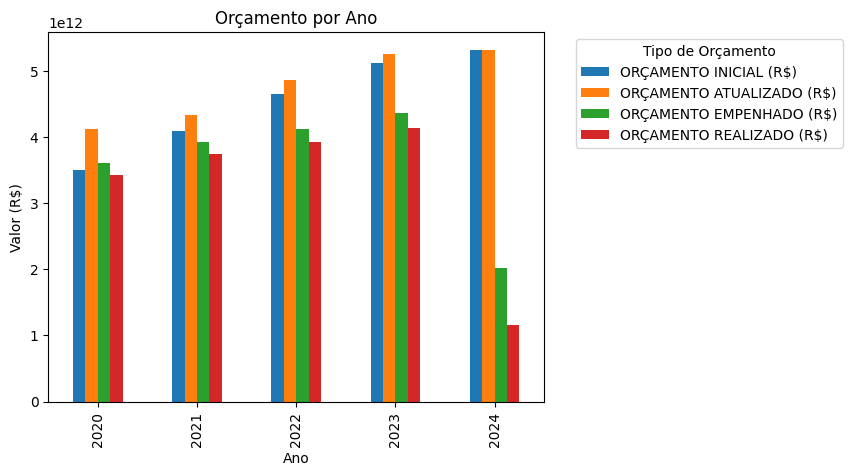

In [76]:
plt.rcdefaults()
plt.figure(figsize=(12, 8))

dados_por_ano = df_despesas.groupby('EXERCÍCIO').sum()

# Plotar
dados_por_ano.plot(kind='bar', y=['ORÇAMENTO INICIAL (R$)', 'ORÇAMENTO ATUALIZADO (R$)', 'ORÇAMENTO EMPENHADO (R$)', 'ORÇAMENTO REALIZADO (R$)'])
plt.xlabel('Ano')
plt.ylabel('Valor (R$)')
plt.title('Orçamento por Ano')
plt.legend(title='Tipo de Orçamento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



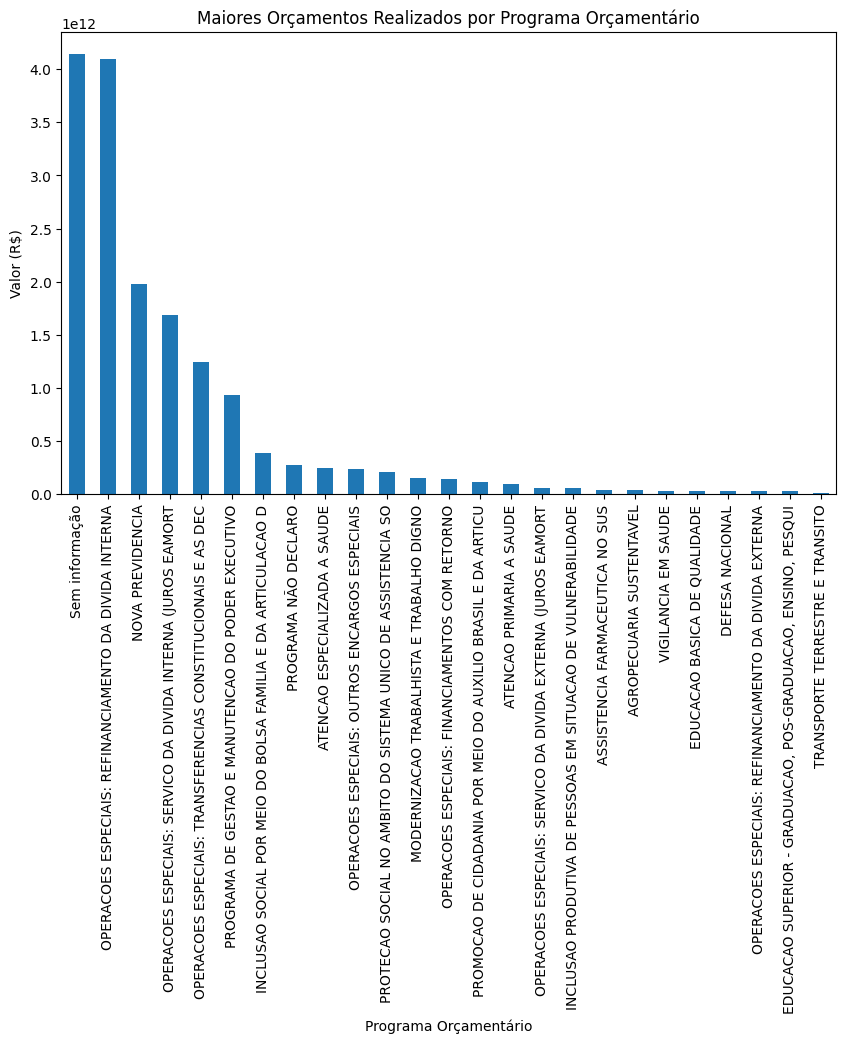

In [70]:
plt.rcdefaults()
plt.figure(figsize=(10,6))
soma_orcamento_por_programa = df_despesas.groupby('NOME PROGRAMA ORÇAMENTÁRIO')['ORÇAMENTO REALIZADO (R$)'].sum()
soma_orcamento_top = soma_orcamento_por_programa.nlargest(25)
soma_orcamento_top.plot(kind='bar')
plt.xlabel('Programa Orçamentário')
plt.ylabel('Valor (R$)')
plt.title('Maiores Orçamentos Realizados por Programa Orçamentário')
plt.show()

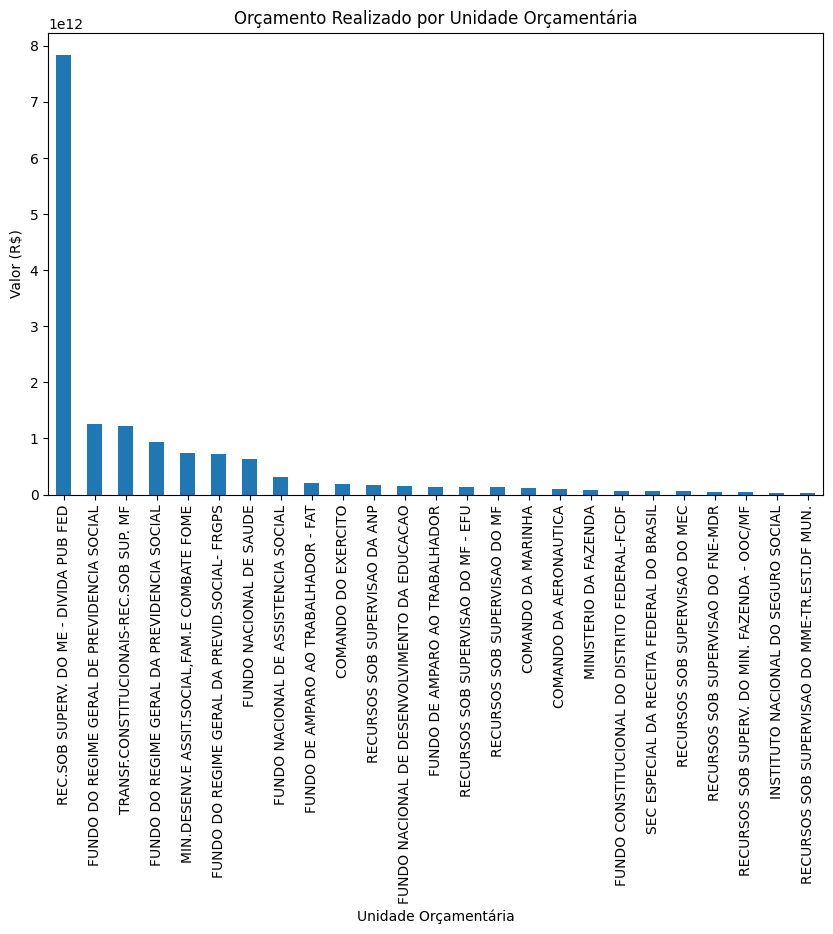

In [77]:
plt.rcdefaults()
plt.figure(figsize=(10,6))
soma_orcamento_unidade=df_despesas.groupby('NOME UNIDADE ORÇAMENTÁRIA')['ORÇAMENTO REALIZADO (R$)'].sum()
soma_orcamento_top = soma_orcamento_unidade.nlargest(25)
soma_orcamento_top.plot(kind='bar')
plt.xlabel('Unidade Orçamentária')
plt.ylabel('Valor (R$)')
plt.title('Orçamento Realizado por Unidade Orçamentária')
plt.show()


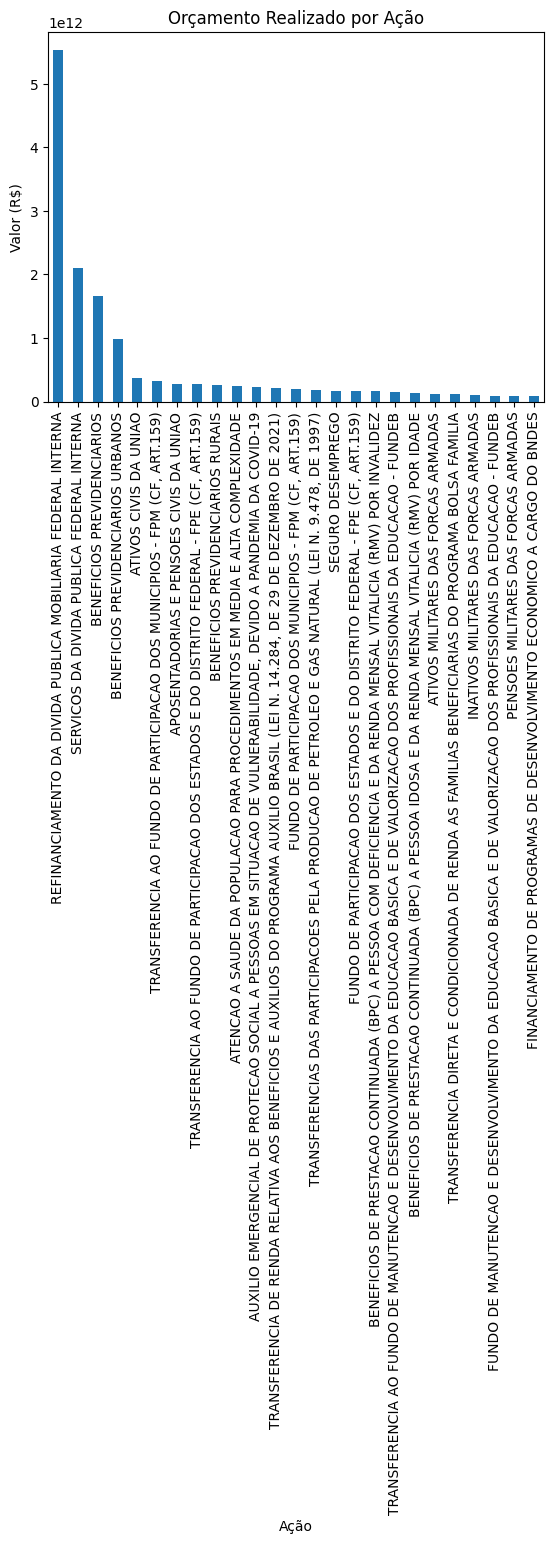

In [78]:
plt.rcdefaults()
soma_orcamento_por_acao=df_despesas.groupby('NOME AÇÃO')['ORÇAMENTO REALIZADO (R$)'].sum()
soma_orcamento_top = soma_orcamento_por_acao.nlargest(25)
soma_orcamento_top.plot(kind='bar')
plt.xlabel('Ação')
plt.ylabel('Valor (R$)')
plt.title('Orçamento Realizado por Ação')
plt.show()


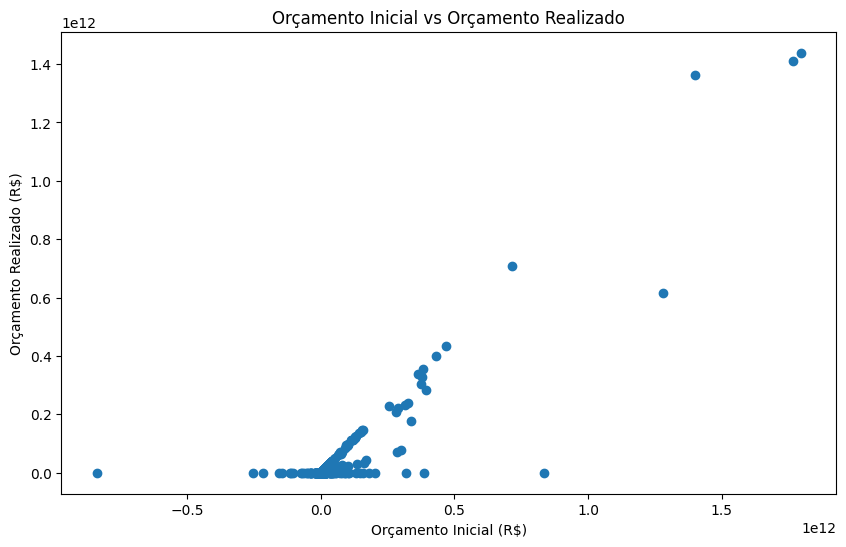

In [79]:
plt.rcdefaults()
plt.figure(figsize=(10,6))
plt.scatter(df_despesas['ORÇAMENTO INICIAL (R$)'], df_despesas['ORÇAMENTO REALIZADO (R$)'])
plt.xlabel('Orçamento Inicial (R$)')
plt.ylabel('Orçamento Realizado (R$)')
plt.title('Orçamento Inicial vs Orçamento Realizado')
plt.show()


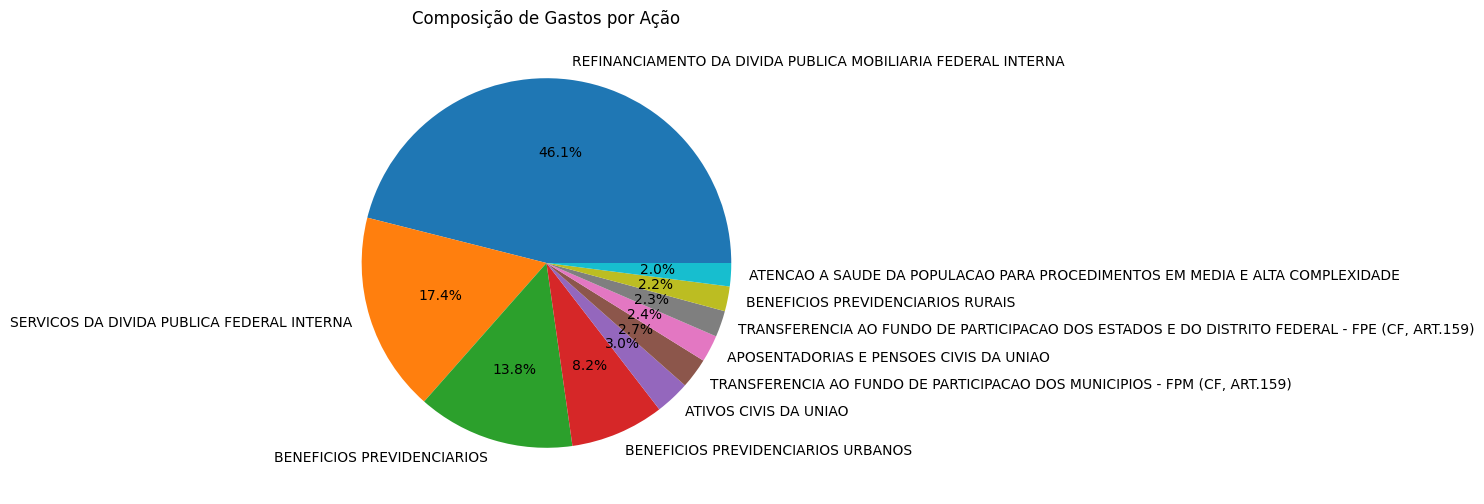

In [80]:
plt.rcdefaults()
plt.figure(figsize=(10,6))
soma_orcamento_acao=df_despesas.groupby('NOME AÇÃO')['ORÇAMENTO REALIZADO (R$)'].sum()
soma_orcamento_top = soma_orcamento_acao.nlargest(10)
soma_orcamento_top.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')  # Remover o rótulo do eixo y
plt.title('Composição de Gastos por Ação')
plt.show()


Text(0, 0.5, 'Valor Realizado (R$)')

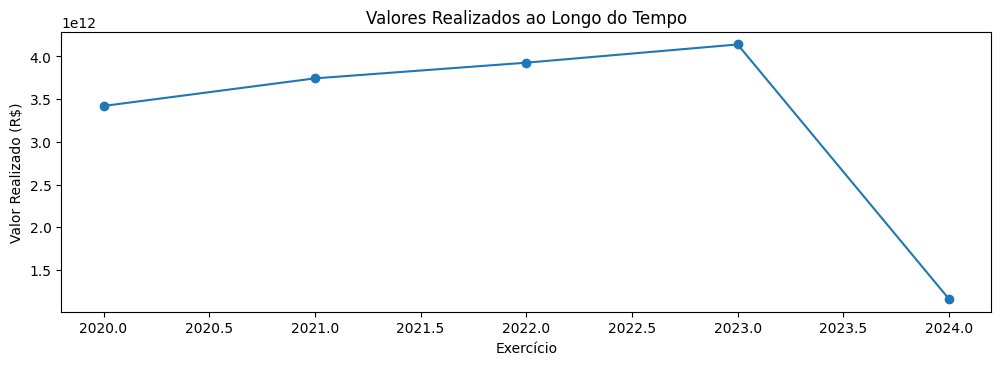

In [82]:
plt.figure(figsize=(12, 8))

# Gráfico de linha para visualizar o histórico de valores realizados ao longo do tempo
plt.subplot(2, 1, 1)
df_despesas.groupby('EXERCÍCIO')['ORÇAMENTO REALIZADO (R$)'].sum().plot(marker='o')
plt.title('Valores Realizados ao Longo do Tempo')
plt.xlabel('Exercício')
plt.ylabel('Valor Realizado (R$)')

In [83]:
fig = px.scatter(df_despesas, x='EXERCÍCIO', y='ORÇAMENTO REALIZADO (R$)', hover_data={'EXERCÍCIO': True, 'ORÇAMENTO REALIZADO (R$)': ':.2f'})
fig.update_traces(marker=dict(size=12, opacity=0.8))
fig.update_layout(title='Valor Realizado ao Longo do Tempo', xaxis_title='Exercício', yaxis_title='Valor Realizado (R$)')
fig.show()